# Import the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')
wine = red.append(white)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###### fixed acidity:  Non-volatile acids that do not evaporate readily.
###### volatile acidity:  High acetic acid in the wine which leads to an unpleasant vinegar taste.
###### citric acid:  Preservative to increase acidity.
###### residual sugar:  Amount Sugar remaining after fermentation stops.
###### chlorides:  Amount of salt in the wine.
###### free sulfur dioxide:  Prevents microbial growth and the oxidation of wine.
###### total sulfur dioxide:  Amount of free bound forms of SO2.
###### density:  Sweeter wines have a higher density.
###### pH:  Level of acidity.
###### sulphates:  Wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant.
###### alcohol:  Amount of alcohol in the wine.
###### quality: The target variable (what we’re trying to predict), which ranges from 3 to 9.

In [4]:
wine.shape

(6497, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [6]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']

# Split the Data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 42)

# Select and Train the Model

In [8]:
model = LogisticRegression()

In [9]:
model.fit(x_train, y_train)

LogisticRegression()

# Evaluate the Model

In [10]:
prediction = model.predict(x_test)

In [11]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.46      0.48      0.47       402
           6       0.48      0.71      0.58       597
           7       0.25      0.00      0.01       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.48      1300
   macro avg       0.31      0.19      0.19      1300
weighted avg       0.41      0.48      0.41      1300



#### Logistic Regression assumes a Binary Target

In [12]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

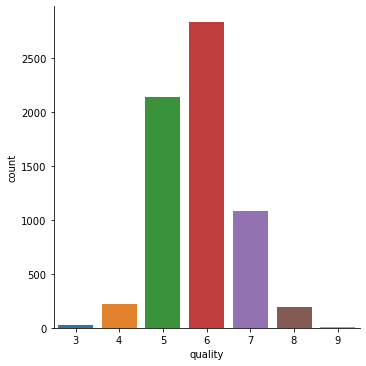

In [13]:
sns.catplot(x = 'quality', data = wine, kind = 'count')

In [14]:
wine['quality'] = wine['quality'].apply(lambda x: 0 if x < 7 else 1)

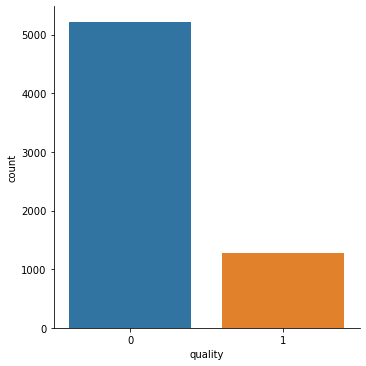

In [15]:
sns.catplot(x = 'quality', data = wine, kind = 'count')

In [16]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1048
           1       0.59      0.23      0.33       252

    accuracy                           0.82      1300
   macro avg       0.71      0.59      0.61      1300
weighted avg       0.79      0.82      0.79      1300



#### Logistic Regression assumes Independent Observations

In [17]:
duplicate_rows = wine[wine.duplicated()]
print(duplicate_rows.count())

fixed acidity           1179
volatile acidity        1179
citric acid             1179
residual sugar          1179
chlorides               1179
free sulfur dioxide     1179
total sulfur dioxide    1179
density                 1179
pH                      1179
sulphates               1179
alcohol                 1179
quality                 1179
dtype: int64


In [18]:
wine = wine.drop_duplicates(subset = None, keep = 'first', inplace = False)
wine.shape

(5318, 12)

In [19]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       854
           1       0.59      0.23      0.33       210

    accuracy                           0.82      1064
   macro avg       0.71      0.60      0.61      1064
weighted avg       0.79      0.82      0.78      1064



#### Logistic Regression assumes Little or No Multicollinearity

<AxesSubplot:>

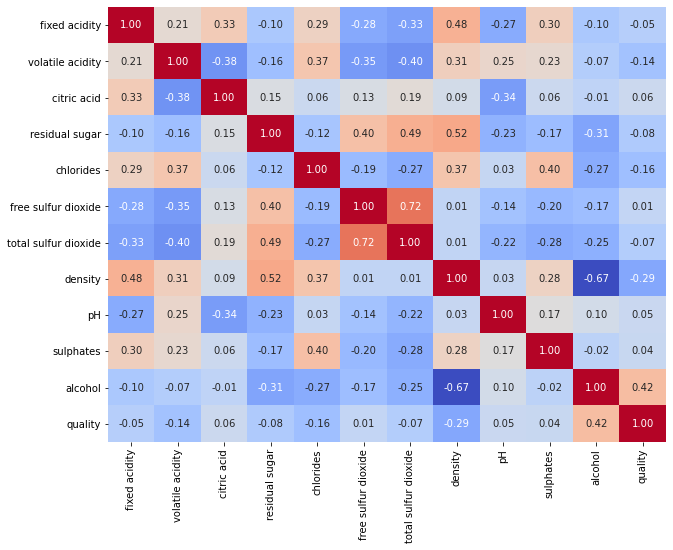

In [20]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

In [21]:
def correlation(dataset, threshold):
    conflicts = set()
    the_matrix = dataset.corr()
    for lp1 in range(len(the_matrix.columns)):
        for lp2 in range(lp1):
            if (abs(the_matrix.iloc[lp1, lp2]) > threshold):
                conflicts.add(the_matrix.columns[lp1] + '|' + the_matrix.columns[lp2])
    return conflicts

In [22]:
conflicts = correlation(wine, 0.60)
print(conflicts)

{'alcohol|density', 'total sulfur dioxide|free sulfur dioxide'}


In [23]:
wine = wine.drop(['free sulfur dioxide', 'density'], axis =1)

<AxesSubplot:>

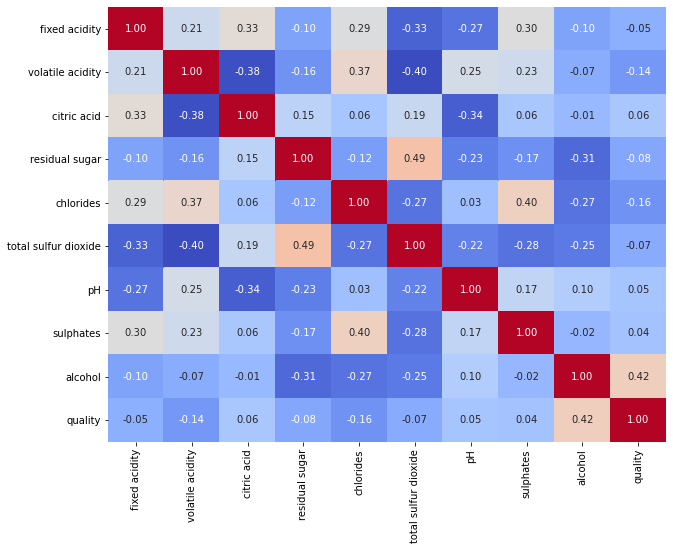

In [24]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

In [25]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       854
           1       0.54      0.28      0.36       210

    accuracy                           0.81      1064
   macro avg       0.69      0.61      0.63      1064
weighted avg       0.78      0.81      0.79      1064



#### Logistic Regression assumes No Extreme Outliers

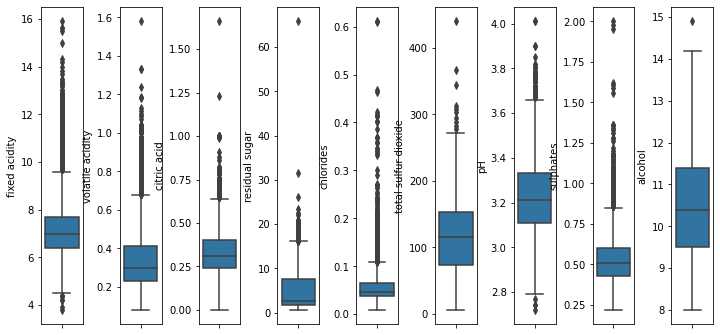

In [26]:
rows = 1
cols = 9
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (10, 5))
axes = axes.flatten()
fig.tight_layout()
for ax, column in zip(axes, wine.iloc[:,:-1]):
    sns.boxplot(y = wine[column], ax = ax)

In [27]:
wine = wine[(np.abs(stats.zscore(wine)) < 3).all(axis = 1)]

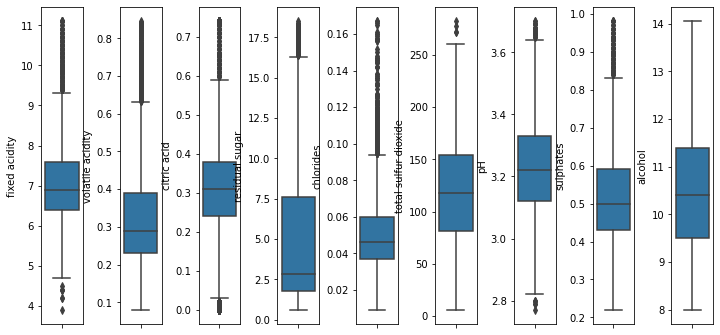

In [28]:
rows = 1
cols = 9
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (10, 5))
axes = axes.flatten()
fig.tight_layout()
for ax, column in zip(axes, wine.iloc[:,:-1]):
    sns.boxplot(y = wine[column], ax = ax)

In [29]:
wine.shape

(4911, 10)

In [30]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       791
           1       0.56      0.26      0.35       192

    accuracy                           0.81       983
   macro avg       0.70      0.60      0.62       983
weighted avg       0.79      0.81      0.79       983



### Logistic Regression assumes Linearity between Features and Logit of the Target

In [31]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
2,7.8,0.76,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
5,7.4,0.66,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,59.0,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,21.0,3.39,0.47,10.0,1


In [32]:
wine.rename(columns = {'fixed acidity':'FA'}, inplace = True)
wine.rename(columns = {'volatile acidity':'VA'}, inplace = True)
wine.rename(columns = {'citric acid':'CA'}, inplace = True)
wine.rename(columns = {'residual sugar':'RS'}, inplace = True)
wine.rename(columns = {'chlorides':'C'}, inplace = True)
wine.rename(columns = {'total sulfur dioxide':'TSD'}, inplace = True)
wine.rename(columns = {'sulphates':'S'}, inplace = True)
wine.rename(columns = {'alcohol':'A'}, inplace = True)

In [33]:
wine.head()

,FA,VA,CA,RS,C,TSD,pH,S,A,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,0
2,7.8,0.76,0.04,2.3,0.092,54.0,3.26,0.65,9.8,0
5,7.4,0.66,0.00,1.8,0.075,40.0,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,59.0,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,21.0,3.39,0.47,10.0,1


In [34]:
logit_model = smf.logit(formula = 'quality ~ FA + VA + CA + RS + C + TSD + pH + S + A', data = wine).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.384231
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 4911
Model:                          Logit   Df Residuals:                     4901
Method:                           MLE   Df Model:                            9
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.2232
Time:                        11:55:26   Log-Likelihood:                -1887.0
converged:                       True   LL-Null:                       -2429.2
Covariance Type:            nonrobust   LLR p-value:                1.019e-227
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.7880      1.370    -13.715      0.000     -21.473     -16.103
FA             0.1621      0.052      3.108      0.002       0.060       0.264
VA            -3.4830      0.434     -8.017      0.000      -4.335      -2.632
CA             0.3377      0.437      0.773      0.440      -0.519       1.194
RS             0.0527      0.012      4.270      0.000       0.029       0.077
C            -17.5495      3.275     -5.359      0.000     -23.968     -11.131
TSD           -0.0019      0.001     -1.794      0.073      -0.004       0.000
pH             1.9737      0.318      6.206      0.000       1.350       2.597
S              1.8262      0.332      5.499      0.000       1.175       2.477
A              0.9726      0.046     21.273      0.000       0.883       1.062
==============================================================================
"""

In [35]:
wine = wine.drop(['CA', 'TSD'], axis =1)

In [36]:
logit_model = smf.logit(formula = 'quality ~ FA + VA + RS + C + pH + S + A', data = wine).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.384590
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 4911
Model:                          Logit   Df Residuals:                     4903
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.2225
Time:                        11:55:27   Log-Likelihood:                -1888.7
converged:                       True   LL-Null:                       -2429.2
Covariance Type:            nonrobust   LLR p-value:                3.811e-229
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5147      1.312    -14.880      0.000     -22.085     -16.944
FA             0.1923      0.047      4.060      0.000       0.099       0.285
VA            -3.5035      0.396     -8.843      0.000      -4.280      -2.727
RS             0.0468      0.012      3.983      0.000       0.024       0.070
C            -16.1744      3.180     -5.086      0.000     -22.407      -9.942
pH             1.9928      0.318      6.276      0.000       1.370       2.615
S              1.8707      0.332      5.641      0.000       1.221       2.521
A              0.9988      0.044     22.863      0.000       0.913       1.084
==============================================================================
"""

In [37]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       791
           1       0.58      0.30      0.39       192

    accuracy                           0.82       983
   macro avg       0.71      0.62      0.64       983
weighted avg       0.80      0.82      0.80       983



In [38]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.85, random_state = 27)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       603
           1       0.56      0.26      0.36       134

    accuracy                           0.83       737
   macro avg       0.70      0.61      0.63       737
weighted avg       0.80      0.83      0.80       737

